In [1]:
import torch
from torch import nn
from ae import AE

import numpy as np

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.ToTensor(),
])

# MNISTデータセットのダウンロードとDataLoaderの設定
train_dataset = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='data', train=False, download=True, transform=transform)

# バッチサイズを設定
batch_size = 500

# DataLoaderの作成
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# バッチサイズを設定
batch_size = 60000

test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [3]:
model = AE(28*28, 200, 2)

In [4]:
model.learn(train_loader)

epoch:1, loss:0.06893615878554953
epoch:2, loss:0.052702531093308906
epoch:3, loss:0.04958174383940817
epoch:4, loss:0.04809172435843644
epoch:5, loss:0.047095318395300075
epoch:6, loss:0.046262630144087206
epoch:7, loss:0.04553082131412851
epoch:8, loss:0.044921259200122174
epoch:9, loss:0.044374206674700024
epoch:10, loss:0.04389455679710172
epoch:11, loss:0.0434830271709366
epoch:12, loss:0.04313444474539837
epoch:13, loss:0.04279895665264931
epoch:14, loss:0.04249378406450528
epoch:15, loss:0.0422369320602978
epoch:16, loss:0.041966752877005006
epoch:17, loss:0.04174731468327907
epoch:18, loss:0.0415135756009767
epoch:19, loss:0.04130818719873909
epoch:20, loss:0.04110535422042638
epoch:21, loss:0.04093607690404443
epoch:22, loss:0.04076410473144355
epoch:23, loss:0.04059869626990887
epoch:24, loss:0.04045021756231284
epoch:25, loss:0.040302845516375134
epoch:26, loss:0.040167109555556996
epoch:27, loss:0.04004353801367663
epoch:28, loss:0.039906940571650736
epoch:29, loss:0.039791

In [5]:
for i, (batch_data, lbl) in enumerate(test_loader):
    x = batch_data.view(-1, 28*28).to(device="cuda")
    z, z_cpu = model.x_to_z(x)
    xh, xh_cpu = model.z_to_x(z)
    if i == 0:
        break

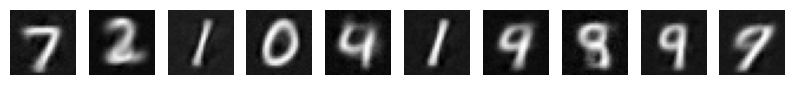

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for j in range(10):
    plt.subplot(10, 10, j + 1)
    x_ = x[j].view(-1, 28, 28).detach().cpu().numpy()
    plt.imshow(x_.squeeze(), cmap='gray')
    plt.axis('off')

    plt.subplot(10, 10, j + 1)
    x_ = xh[j].view(-1, 28, 28).detach().cpu().numpy()
    plt.imshow(x_.squeeze(), cmap='gray')
    plt.axis('off')

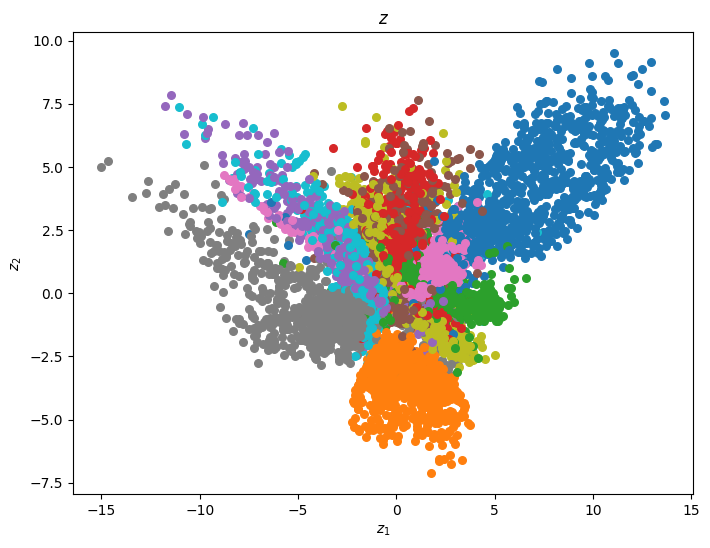

In [7]:
colors = [
    (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),   # 青
    (1.0, 0.4980392156862745, 0.054901960784313725),                 # オレンジ
    (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),  # 緑
    (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),   # 赤
    (0.5803921568627451, 0.403921568627451, 0.7411764705882353),     # 紫
    (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),  # 茶
    (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),    # ピンク
    (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),    # グレー
    (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),   # イエロー
    (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)     # シアン
]

plt.figure(figsize=(8, 6))
for i, (x, y) in enumerate(z_cpu):
    ci = colors[int(lbl[i].detach().cpu().numpy())]
    plt.scatter(x, y, color=ci, marker='o', s=30)
plt.title('$z$')
plt.xlabel('$z_{1}$')
plt.ylabel('$z_{2}$')
plt.show()